## Introduction to GNNs with PyTorch Geometric

In this short notebook, the goal is to provide a introductory guide to get started with Graph Neural Networks using the popular library called [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/index.html). PyTorch Geometric is a PyTorch based libary hence we will be using PyTorch in this tutorial. 

The code used in this tutorial has been adapted from their official [examples](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html). I have incorporated a bit more beginner-friendly guidance and kept it minimal.

In [1]:
# Find the CUDA version PyTorch was installed with
!python -c "import torch; print(torch.version.cuda)"

None


In [2]:
# PyTorch version
!python -c "import torch; print(torch.__version__)"

2.3.0+cpu


Install the follow packages but make sure to 

---

install the right version below. Find more instructions [here](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html) if you get lost. 

In [3]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.11.0.html

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://data.pyg.org/whl/torch-1.11.0.html


In [2]:
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.11.0.html

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://data.pyg.org/whl/torch-1.11.0.html
Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install torch-geometric

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


## Getting Started

Import PyTorch

In [1]:
# 包 torch 包含了多维张量的数据结构以及基于其上的多种数学操作。另外，它也提供了多种工具，其中一些可以更有效地对张量和任意类型进行序列化。
import torch

# print torch version
print(torch.__version__)

2.3.0+cpu


The great thing about PyTorch Geometric is that it contain useful functionalities to import and load graph related data.   
PyTorch Geometric最好的事情是它包含了对于导入和加载图相关数据有用的功能。

In [4]:
from torch_geometric.data import Data
'''
    PyG(PyTorch Geometric Library) 提供了torch_geometric.data.Data (下面简称Data) 用于构建图，包括 5 个属性，每一个属性都不是必须的，可以为空。
        x: 用于存储每个节点的特征，形状是[num_nodes, num_node_features]。
        edge_index: 用于存储节点之间的边，形状是 [2, num_edges]。
        pos: 存储节点的坐标，形状是[num_nodes, num_dimensions]。
        y: 存储样本标签。如果是每个节点都有标签，那么形状是[num_nodes, *]；如果是整张图只有一个标签，那么形状是[1, *]。
        edge_attr: 存储边的特征。形状是[num_edges, num_edge_features]。
    实际上, Data对象不仅仅限制于这些属性, 我们可以通过data.face来扩展Data, 以张量保存三维网格中三角形的连接性。
        需要注意的的是, 在Data里包含了样本的 label, 这意味和 PyTorch 稍有不同。
        在PyTorch中, 我们重写Dataset的__getitem__()，根据 index 返回对应的样本和 label。
        在 PyG 中,我们使用的不是这种写法，而是在get()函数中根据 index 返回torch_geometric.data.Data类型的数据,在Data里包含了数据和 label。
'''

'\n    PyG(PyTorch Geometric Library) 提供了torch_geometric.data.Data (下面简称Data) 用于构建图，包括 5 个属性，每一个属性都不是必须的，可以为空。\n        x: 用于存储每个节点的特征，形状是[num_nodes, num_node_features]。\n        edge_index: 用于存储节点之间的边，形状是 [2, num_edges]。\n        pos: 存储节点的坐标，形状是[num_nodes, num_dimensions]。\n        y: 存储样本标签。如果是每个节点都有标签，那么形状是[num_nodes, *]；如果是整张图只有一个标签，那么形状是[1, *]。\n        edge_attr: 存储边的特征。形状是[num_edges, num_edge_features]。\n    实际上, Data对象不仅仅限制于这些属性, 我们可以通过data.face来扩展Data, 以张量保存三维网格中三角形的连接性。\n        需要注意的的是, 在Data里包含了样本的 label, 这意味和 PyTorch 稍有不同。\n        在PyTorch中, 我们重写Dataset的__getitem__()，根据 index 返回对应的样本和 label。\n        在 PyG 中,我们使用的不是这种写法，而是在get()函数中根据 index 返回torch_geometric.data.Data类型的数据,在Data里包含了数据和 label。\n'

Now let's create an unweighted and undirected graph with three nodes and four total edges.

In [7]:
# torch.Tensor是一种包含单一数据类型元素的多维矩阵。
# define edge list
edge_index = torch.tensor([[0, 1, 1, 2], [1, 0, 2, 1]], dtype=torch.long)  # four total edges 第一个list是起始边，第二个list是目标边。 0->1, 1->0, 1->2, 2->1
# print(edge_index)
# define node features
x = torch.tensor([[-1], [0], [1]])  # 三个点
# print(x)
# create graph data object
'''
    x:          用于存储每个节点的特征，形状是[num_nodes, num_node_features];
    edge_index: 用于存储节点之间的边，形状是 [2, num_edges](使用稀疏的方式存储边关系（(edge_index中边的存储方式,有两个list,第 1 个list是边的起始点,第 2 个list是边的目标节点));
    pos:        存储节点的坐标，形状是[num_nodes, num_dimensions]
    y:          存储样本标签。如果是每个节点都有标签，那么形状是[num_nodes, *]；如果是整张图只有一个标签，那么形状是[1, *];
    edge_attr:  存储边的特征。形状是[num_edges, num_edge_features];
'''
data = Data(x=x, edge_index=edge_index)
print(data)

Data(x=[3, 1], edge_index=[2, 4])


Our data object `Data` has many useful utility functions to check the properties of the graph. 

In [8]:
# check number of edges of the graph
print(data.num_edges)   # 边的数目

4


In [11]:
# check number of nodes of the graph
print(data.num_nodes)   # 几个顶点

3


In [19]:
# check number of features of the graph
print(data.num_features)    # 图的特征

1


In [20]:
# check if graph is directed
print(data.is_directed())   # 是否是有向图

False


## Loading Data

Find more fun functions related to graph data [here](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data). 

One of the cool things about the PyTorch Geometric library is that it contains out-of-the-box benchmark datasets that are ready to use and explore. A popular dataset is the Cora dataset that is used for supervised graph node classification. (We will talk about these applications in an upcoming tutorial but for now we will focus on the data itself).

"The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words." - [Papers with Code](https://paperswithcode.com/dataset/cora).

_out-of-the-box benchmark datasets：开箱即用的基准数据集  
Cora dataset：用于研究监督图节点分类。2708片文章分为7类，5429条引用，dictionary为1433个唯一word的向量，用0/1标识是否存在改word_

Let's load the Cora dataset:

In [13]:
# Planetoid是 torch_geometric.datasets中的一个类。利用Planetoid类可以处理三个数据集，分别为“Cora”、“CiteSeer”和“PubMed”。
# 这三个数据集是“Revisiting Semi-Supervised Learning with Graph Embeddings”论文中的引文网络数据集。节点代表文档，边代表引用链接。训练集、验证集和测试集的划分由二进制掩码(binary masks)给出。
from torch_geometric.datasets import Planetoid
# CLASS Planetoid(root: str, name: str, split: str = 'public', num_train_per_class: int = 20, num_val: int = 500, num_test: int = 1000, transform: Optional[Callable] = None, pre_transform: Optional[Callable] = None)
# root:     (str)，数据集的来源；可以是本地文件，如果是一个项目文件夹中不存在的地址，程序将会新建文件夹，将数据集下载后保存到文件中。
# name:     （str）数据集的名字；可以为'Cora','CiteSeer','PubMed'
# split：  （str）选择划分方式；可以为("public", "full", "random")默认值为'public'。如果设置为"public"，则拆分将是 “Revisiting Semi-Supervised Learning with Graph Embeddings“论文中的公共固定拆分。如果设置为"full"，则除了验证集和测试集中的节点之外的所有节点都将用于训练（如 “FastGCN: Fast Learning with Graph Convolutional Networks via Importance Sampling”论文中所述）。如果设置为"random"，则训练、验证和测试集将根据 num_val和 num_train_per_class,num_test生成 。
# num_train_per_class：每一个类中的训练样本数量，默认值20
# num_val ：        验证集的样本数量，默认值500
# num_test ：       测试集的样本数量，默认值1000
# 数据类型：        torch_geometric.datasets.planetoid.Planetoid
dataset = Planetoid(root='tmp/Cora', name='Cora')

Let's check some of the properties of the Cora dataset.

In [15]:
# number of graphs
print("Number of graphs: ", len(dataset))   # 数据集数量

# number of features
print("Number of features: ", dataset.num_features) # 特征

# number of classes
print("Number of classes: ", dataset.num_classes)   #类别

Number of graphs:  1
Number of features:  1433
Number of classes:  7


We can see that this particular graph dataset only contains one graph. Graph data can be very complex and can include multiple graphs depending on the type of data and application. Let's check more feature of the Cora dataset:

In [17]:
# select the first graph
data = dataset[0]   # 选择第一个图

# number of nodes
print("Number of nodes: ", data.num_nodes)  # 顶点数

# number of edges
print("Number of edges: ", data.num_edges)  # 边数

# check if directed
print("Is directed: ", data.is_directed())  # 是否为有向图

Number of nodes:  2708
Number of edges:  10556
Is directed:  False


You can sample nodes from the graph this way:

In [23]:
# sample nodes from the graph
# 参见torch_geometric.data.Data数据集--x:用于存储每个节点的特征，形状是[num_nodes, num_node_features];
print("Shape of sample nodes: ", data.x[:5].shape)  # We extracted 5 nodes from the graph and checked its shape. You will see that each node has `1433` features.

Shape of sample nodes:  torch.Size([5, 1433])


We extracted 5 nodes from the graph and checked its shape. You will see that each node has `1433` features.

Another great advantage of using PyTorch Geometric to load the Cora data is that it comes pre-processed and ready to use. It also has the splits for training, validation and test which we can directly use for training a GNN.

Let's check some stats for the partitions of the data:

In [25]:
# check training nodes
print("# of nodes to train on: ", data.train_mask.sum().item()) # 训练集节点数

# check test nodes
print("# of nodes to test on: ", data.test_mask.sum().item())   # 测试集节点数

# check validation nodes
print("# of nodes to validate on: ", data.val_mask.sum().item())    # 验证集节点数

# of nodes to train on:  140
# of nodes to test on:  1000
# of nodes to validate on:  500


That information is important as it will indicate to our model which nodes to train against and which to test against, and so on.

When training neural networks we train them using batches of data. PyTorch Geometric provides efficient processes to load batches of data.

PyTorch Geometric contains a data loader which is a very popular feature in PyTorch to efficiently load data when training neural networks.
 
So let's try to load the data using the built in `DataLoader`:

*data loader:数据加载器，训练神经网络时批量加载数据*


In [29]:
from torch_geometric.datasets import Planetoid
from torch_geometric.loader import DataLoader
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')   # torch.device代表将torch.Tensor分配到的设备的对象。

In [55]:
print(device)

cpu


In [30]:
dataset = Planetoid(root='tmp/Cora', name='Cora')
data = dataset[0].to(device)    # to(device)方法可以将张量移动到指定的设备

Print some quick statistics about the data:

In [32]:
'''
    x:          用于存储每个节点的特征，形状是[num_nodes, num_node_features];
    edge_index: 用于存储节点之间的边，形状是 [2, num_edges](使用稀疏的方式存储边关系（(edge_index中边的存储方式,有两个list,第 1 个list是边的起始点,第 2 个list是边的目标节点));
    pos:        存储节点的坐标，形状是[num_nodes, num_dimensions]
    y:          存储样本标签。如果是每个节点都有标签，那么形状是[num_nodes, *]；如果是整张图只有一个标签，那么形状是[1, *];
    edge_attr:  存储边的特征。形状是[num_edges, num_edge_features];
'''
print("X shape: ", data.x.shape)
print("Edge shape: ", data.edge_index.shape)
print("Y shape: ", data.y.shape)

X shape:  torch.Size([2708, 1433])
Edge shape:  torch.Size([2, 10556])
Y shape:  torch.Size([2708])


## Model and Training

Finally, let's define a standard GCN to train on the Cora dataset. The aim is to train a model that gets better at predicting the class of the node.

To keep thins simple we will use the same model definition as used in the [tutorial](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html) we adpated the code from. Note that we are using the built-in `GCNConv` model but you could easily implement your own (something we will cover in a future tutorial). 

The model below uses two `GCNConv` layers. The first layer is followed by a non-linearity `ReLU` and `Dropout`. The result is fed to the second layer on top of which we apply `Softmax` to get distribution over the number of classes.

*GCN：图卷积网络(Graph Convolutional Networks)*

In [40]:
# 可参考 https://blog.csdn.net/weixin_51976215/article/details/136767850
# nn.functional 是PyTorch中一个重要的模块，它包含了许多用于构建神经网络的函数。与nn.Module 不同，nn.functional 中的函数不具有可学习的参数。这些函数通常用于执行各种非线性操作、损失函数、激活函数等。
import torch.nn.functional as F
from torch_geometric.nn import GCNConv  # we are using the built-in `GCNConv` model

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        """ GCNConv layers """
        self.conv1 = GCNConv(data.num_features, 16) # 创建第一个特征图层；输入维度为数据节点特征维度，输出特征维度为16
        self.conv2 = GCNConv(16, dataset.num_classes)   # 创建第二个特征图层；输入维度为16，输出特征维度为数据集类别数目

    def forward(self, data):    # 定义前向传播函数
        x, edge_index = data.x, data.edge_index # 从data参数中获取节点特征和边索引
        x = self.conv1(x, edge_index)   # 通过第一个图卷积层处理节点特征
        x = F.relu(x)   # 对输出进行ReLU激活函数操作
        x = F.dropout(x, training=self.training)    # 对输出进行Dropout操作，用于防止过拟合
        x = self.conv2(x, edge_index)   # 通过第二个图卷积层处理节点特征

        return F.log_softmax(x, dim=1)  # 对输出进行LogSoftmax操作，得到预测结果

Initial model and optimizer--初始化模型和优化器

In [35]:
model = GCN().to(device)    # 实例化GCN类，并移动到对应设备
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)    # 定义Adam优化器

Define accuracy function for evaluating performance:--定义评估性能的accuracy function

In [42]:
# useful function for computing accuracy
def compute_accuracy(pred_y, y):
    return (pred_y == y).sum()  # 计算相等的元素个数

And finally we train the model on the trainin nodes for 200 epochs:

In [54]:
# train the model
model.train()   # 将模型设置为训练模式
losses = []
accuracies = []
for epoch in range(200):    # 进行训练循环，共200个epoch
    optimizer.zero_grad()   # 梯度清零
    out = model(data)   # 前向传播，得到模型输出

    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])    # 计算损失，使用负对数似然损失函数   
    # （1）torch.argmax(input, dim=None, keepdim=False)返回指定维度最大值的序号；
    # （2）dim给定的定义是：the demention to reduce.也就是把dim这个维度的，变成这个维度的最大值的index。
    correct = compute_accuracy(out.argmax(dim=1)[data.train_mask], data.y[data.train_mask]) # 计算分类正确的个数
    acc = int(correct) / int(data.train_mask.sum()) # 计算准确率，分类正确的个数/训练标记的总数
    losses.append(loss.item())  # 添加到losses列表末尾
    accuracies.append(acc)  # 添加到accuracies列表末尾

    loss.backward() # 反向传播计算梯度
    optimizer.step()    # 更新模型参数
    if (epoch+1) % 10 == 0: # 每10 epoch 打印一次对应的损失和准确率
        print('Epoch: {}, Loss: {:.4f}, Training Acc: {:.4f}'.format(epoch+1, loss.item(), acc))
        # if (epoch+1) == 10:
        #     print(out)
        #     print(len(out)) # 2708
        #     print(out.argmax(dim=1))
        #     print(data.train_mask)
        #     print(out.argmax(dim=1)[data.train_mask])
        #     print(len(data))
        #     print(data)
        #     print(data.y)
        #     print(data.y[data.train_mask])
        #     print(data.train_mask.sum())


Epoch: 10, Loss: 0.0169, Training Acc: 1.0000
Epoch: 20, Loss: 0.0127, Training Acc: 1.0000
Epoch: 30, Loss: 0.0205, Training Acc: 1.0000
Epoch: 40, Loss: 0.0132, Training Acc: 1.0000
Epoch: 50, Loss: 0.0127, Training Acc: 1.0000
Epoch: 60, Loss: 0.0181, Training Acc: 0.9929
Epoch: 70, Loss: 0.0200, Training Acc: 1.0000
Epoch: 80, Loss: 0.0229, Training Acc: 1.0000
Epoch: 90, Loss: 0.0177, Training Acc: 1.0000
Epoch: 100, Loss: 0.0167, Training Acc: 1.0000
Epoch: 110, Loss: 0.0116, Training Acc: 1.0000
Epoch: 120, Loss: 0.0212, Training Acc: 0.9929
Epoch: 130, Loss: 0.0166, Training Acc: 1.0000
Epoch: 140, Loss: 0.0107, Training Acc: 1.0000
Epoch: 150, Loss: 0.0115, Training Acc: 1.0000
Epoch: 160, Loss: 0.0130, Training Acc: 1.0000
Epoch: 170, Loss: 0.0132, Training Acc: 1.0000
Epoch: 180, Loss: 0.0166, Training Acc: 1.0000
Epoch: 190, Loss: 0.0222, Training Acc: 1.0000
Epoch: 200, Loss: 0.0318, Training Acc: 0.9929


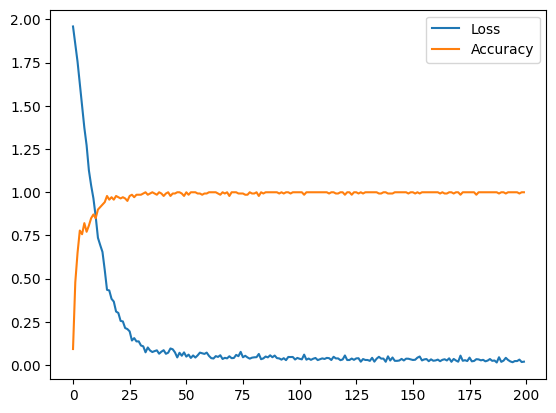

In [38]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
plt.plot(losses)    # 画出loss曲线
plt.plot(accuracies)    # 画出Accuracy曲线
plt.legend(['Loss', 'Accuracy'])
plt.show()

It looks like the model achieves a very high accuracy and small loss on the training dataset. To see how well it generalizes, let's test on the testing nodes:

In [29]:
# evaluate the model on test set
model.eval()    # 将模型设置为评估模式
pred = model(data).argmax(dim=1)    # 进行预测，并预测结果的最大值作为预测类别
correct = compute_accuracy(pred[data.test_mask], data.y[data.test_mask])    # 计算预测正确的数量
acc = int(correct) / int(data.test_mask.sum())  # 计算准确率
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.8010


Very cool! It seems we got a very nice accuracy for the test as well. Our model is doing okay. There are many ways you can go about trying to improve this model, but we will keep that for another time. Hopefully, with this tutorial you got a glimpse of graph data and how to use PyTorch Geometric to train GNNs on a very popular dataset. 

Note that I haven't tested if this code works with GPUs. I will leave that as an exercise for the learner. 

If you are interested in the full tutorial and more examples, visit the [PyTorch Geomtric documentation](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html) where I adapted the code from. 

Feel free to reach out on [Twitter](https://twitter.com/omarsar0) if you have any further questions.